In [324]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [325]:
image = cv2.imread('test.jpg')

In [326]:
image.shape

(1829, 1200, 3)

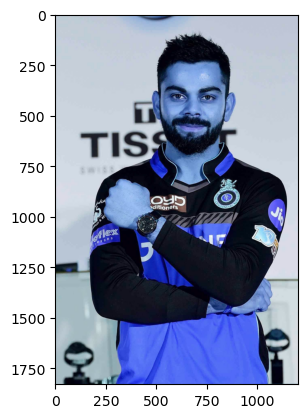

In [327]:
plt.imshow(image)

In [328]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

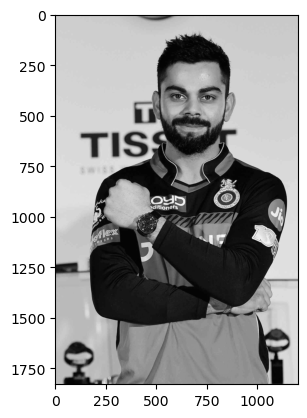

In [329]:
plt.imshow(gray_image,cmap='gray')

In [330]:
gray_image.shape

(1829, 1200)

In [331]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\tarun\Downloads\python\project\facial_recognition\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\tarun\Downloads\python\project\facial_recognition\haarcascade_eye.xml')

In [332]:
faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)

In [333]:
faces

array([[472, 243, 421, 421]])

In [334]:
(x,y,w,h) = faces[0]

In [335]:
x,y,w,h

(472, 243, 421, 421)

In [336]:
face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

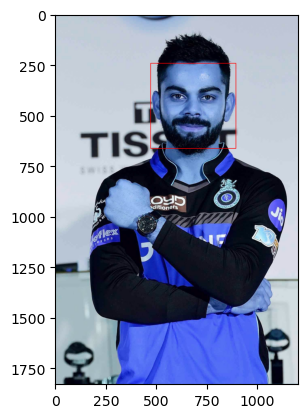

In [337]:
plt.imshow(face_img)

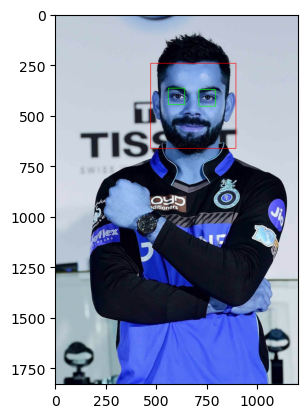

In [338]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

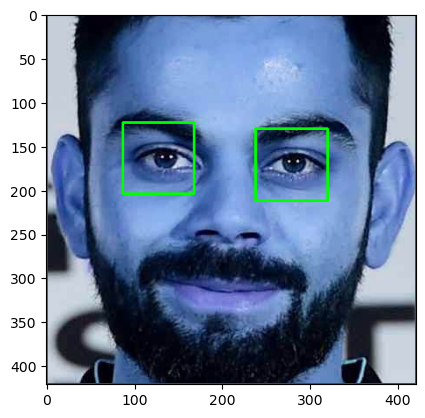

In [339]:
plt.imshow(roi_color)

In [340]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [341]:
cropped_image = get_cropped_image_if_2_eyes('test.jpg')

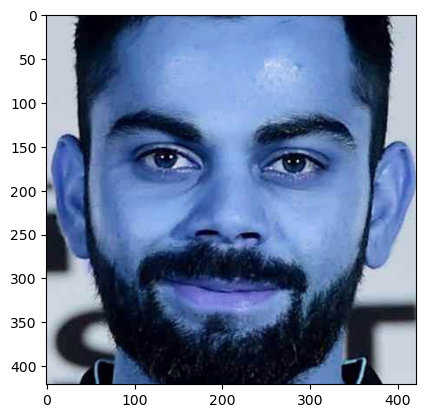

In [342]:
plt.imshow(cropped_image)

In [343]:
# wavelet transformation

In [344]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

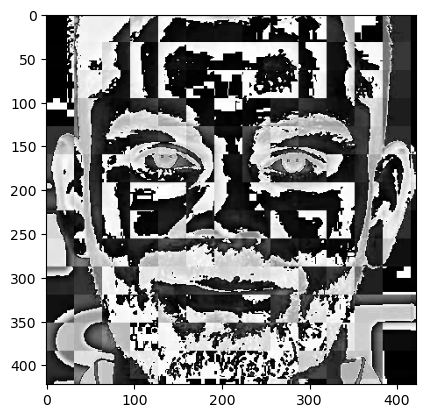

In [345]:
plt.imshow(w2d(cropped_image,'db1',5),cmap='gray')

In [346]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [347]:
img_dirs = []
for i in os.scandir(path_to_data):
    img_dirs.append(i.path)

In [348]:
img_dirs

['./dataset/federer',
 './dataset/kohli',
 './dataset/lebron',
 './dataset/messi',
 './dataset/woods']

In [349]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count = count + 1

In [350]:
celebrity_file_names_dict

{'federer': ['./dataset/cropped/federer/federer1.png',
  './dataset/cropped/federer/federer2.png',
  './dataset/cropped/federer/federer3.png',
  './dataset/cropped/federer/federer4.png',
  './dataset/cropped/federer/federer5.png',
  './dataset/cropped/federer/federer6.png',
  './dataset/cropped/federer/federer7.png',
  './dataset/cropped/federer/federer8.png',
  './dataset/cropped/federer/federer9.png',
  './dataset/cropped/federer/federer10.png',
  './dataset/cropped/federer/federer11.png',
  './dataset/cropped/federer/federer12.png',
  './dataset/cropped/federer/federer13.png',
  './dataset/cropped/federer/federer14.png',
  './dataset/cropped/federer/federer15.png',
  './dataset/cropped/federer/federer16.png',
  './dataset/cropped/federer/federer17.png',
  './dataset/cropped/federer/federer18.png',
  './dataset/cropped/federer/federer19.png',
  './dataset/cropped/federer/federer20.png',
  './dataset/cropped/federer/federer21.png',
  './dataset/cropped/federer/federer22.png',
  './dat

In [351]:
names_dict = {}
count = 1
for name in celebrity_file_names_dict.keys():
    names_dict[name] = count
    count = count + 1

In [352]:
names_dict

{'federer': 1, 'kohli': 2, 'lebron': 3, 'messi': 4, 'woods': 5}

In [353]:
x = []
y = []
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        image = cv2.imread(training_image)
        scaled_image = cv2.resize(image,(32,32))
        image_haar = w2d(image,'db1',5)
        scaled_haar_image = cv2.resize(image_haar,(32,32))
        combined_image = np.vstack((scaled_image.reshape(32*32*3,1),scaled_haar_image.reshape(32*32,1)))
        x.append(combined_image)
        y.append(names_dict[celebrity_name])

In [354]:
len(x)

160

In [355]:
len(y)

160

In [356]:
x = np.array(x).reshape(len(x),4096).astype(float)

In [357]:
x.shape

(160, 4096)

In [358]:
# data cleaning is done 
# proceeding with the training

In [359]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [360]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [361]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [362]:
pipe.score(xtest,ytest)

0.75

In [363]:
ypred = pipe.predict(xtest)

In [364]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.85      0.79      0.81        14
           3       0.80      0.73      0.76        11
           4       0.57      0.80      0.67         5
           5       0.33      0.33      0.33         3

    accuracy                           0.75        40
   macro avg       0.68      0.70      0.69        40
weighted avg       0.76      0.75      0.75        40



In [367]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [368]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [370]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(xtrain, ytrain)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.733333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.516667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.758333,{'logisticregression__C': 1}


In [373]:
best_estimators['logistic_regression'].score(xtest,ytest)

0.85

In [374]:
best_estimators['svm'].score(xtest,ytest)

0.825

In [375]:
best_clf = best_estimators['logistic_regression']

In [376]:
ypred = best_clf.predict(xtest)

In [377]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       1.00      0.86      0.92        14
           3       0.83      0.91      0.87        11
           4       0.67      0.80      0.73         5
           5       1.00      0.33      0.50         3

    accuracy                           0.85        40
   macro avg       0.86      0.78      0.78        40
weighted avg       0.87      0.85      0.84        40



In [379]:
from sklearn.metrics import confusion_matrix

In [382]:
cm = confusion_matrix(ytest,ypred)

Text(95.72222222222221, 0.5, 'Truth')

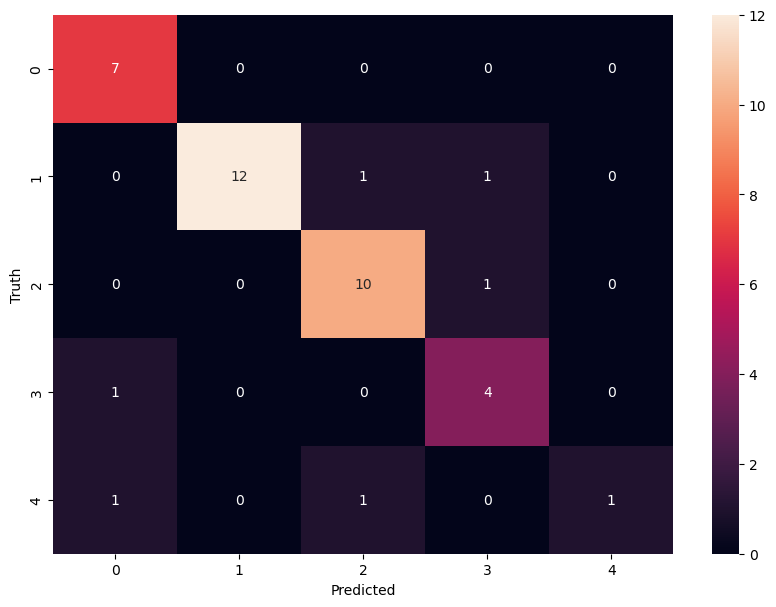

In [383]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [384]:
names_dict

{'federer': 1, 'kohli': 2, 'lebron': 3, 'messi': 4, 'woods': 5}

In [385]:
import joblib

In [386]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [387]:
import json

In [389]:
with open('names_dictionary.json','w') as f:
    f.write(json.dumps(names_dict))